## recommended if you are able to do
- should be able to run script in local computer
- install pandas, numpy and sklearn

## First session talk
- Intro (super and unsupervised learning basics) 30min
- Class and imports overview 15mins
- Numpy and pandas 15 mins

## Second session coding
- Talk about pipeline - train + val + test
- regression, clustering, classification 3 notebooks
- Demo data and fitting a line then overfitting, underfitting (while teaching each of 3 topics above)
- mnist assignment

overfitting, underfitting, regularization?

metric, loss => difference between regression and classification 
mean squared error

# Linear Regression
<img src='images/Linear-Regression-model-sample-illustration.ppm' width=400><br>
Example of 1D linear Regression

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
np.set_printoptions(precision=3)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Data description : [california_housing](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)

In [2]:
X, y = datasets.fetch_california_housing(as_frame=True, return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print('coefficients', model.coef_)
print('intercepts', model.intercept_)

coefficients [ 4.476e-01  9.568e-03 -1.248e-01  7.945e-01 -1.439e-06 -3.443e-03
 -4.186e-01 -4.334e-01]
intercepts -37.02782758526927


# Example predictions

In [14]:
X_example = np.array(X_train)[:10]
y_example = np.array(y_train)[:10]


# manually predict first example
predicted = model.intercept_
for i, x_i in enumerate(X_example[0]):
    predicted += model.coef_[i] * x_i
    
print(predicted, y_example[0])

2.2306738806198307 2.285


In [15]:
y_example_pred = model.predict(X_example)

pd.DataFrame({
    'actual': y_example,
    'predicted':  y_example_pred,
    'difference':  y_example_pred - y_example,
}).round(3)

,actual,predicted,difference
0,2.285,2.231,-0.054
1,2.799,4.177,1.378
2,1.830,2.104,0.274
3,4.658,4.160,-0.498
4,1.500,-1.108,-2.608
5,2.509,1.232,-1.277
6,5.000,2.611,-2.389
7,1.208,-0.481,-1.689
8,5.000,6.638,1.638
9,0.993,-0.168,-1.161


# Mean Squared Error

In [6]:
mse = model.score(X_train, y_train)
print("Train mean squared error", mse)

mse = model.score(X_test, y_test)
print("Test mean squared error", mse)

Train mean squared error 0.609873031052925
Test mean squared error 0.5910509795491352


# Plots

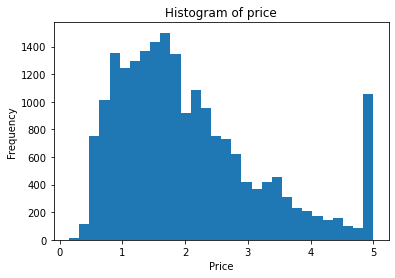

In [4]:
plt.hist(y, bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of price');